<a href="https://colab.research.google.com/github/MohammadParsaTheFirst/Deep-generative-models-course/blob/main/CHW2/DGM_HW2_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Deep Generative Models
</font>

<hr/>
<font color="#800080" size=5>
Assignment 2: Variational Autoencoders
<br>
</font>
<font size=5>
Instructor: Dr. S. Amini
<br>
</font>
<font size=4>
Fall 2024
<br>
</font>
<font face="Times New Roman" size=4>
Deadline: Month day at 23:55
</font>
<hr>
</div></font>

In [14]:
name = 'MoohammadParsa Dini'
std_id = '400101204'

In [1]:
import numpy as np
from tqdm import trange
from matplotlib import pyplot as plt

import torch
from torch import nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset

In [15]:
# Get cpu, gpu or mps device for training.
device = ("cuda" if torch.cuda.is_available()
          else "mps" if torch.backends.mps.is_available()
          else "cpu")
print(f"Using {device} device")

Using cpu device


# Dataset (5 points)

Download the MNIST dataset and merge the train and test datasets for training the generative model.

Merge the two datasets to train the model on the images.

In [2]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda')
    print('HAHA! MY BELOVED GPU IS AVAILABLE')
else:
    device = torch.device('cpu')
    print('HEEBWORKING ON CPU FOR CRYING OUT LOUD')

# TODO: Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load train and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# TODO: Concatenate train and test datasets
merged_dataset = ConcatDataset([train_dataset, test_dataset])
merged_loader = DataLoader(merged_dataset, batch_size=64, shuffle=True)

print(f'device: {device}')
print(f'The size of the merged dataset is {len(merged_loader.dataset)}')

HEEBWORKING ON CPU FOR CRYING OUT LOUD
Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 37.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.12MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 9.10MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.26MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

device: cpu
The size of the merged dataset is 70000


# EDA (10 points)

Plot the distribution of each class in the dataset.

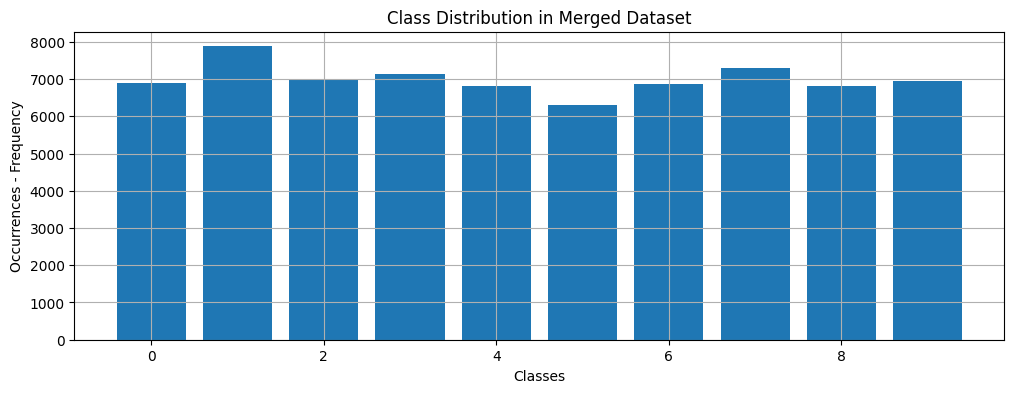

In [16]:
from collections import defaultdict

def plot_class_distribution(mergeloader):
    classes = range(10)
    # TODO: Initialize a dictionary to count occurrences of each class
    occurr = defaultdict(int)
    # TODO: Iterate through the DataLoader to count the labels
    for batch_idx, (data, target) in enumerate(mergeloader):
        for label in target:
            occurr[int(label)] += 1
    # TODO: Plot the histogram
    plt.figure(figsize=(12,4))
    my_occurr = []

    for i in range(10):
        my_occurr.append(occurr[i])

    plt.bar(classes, my_occurr)
    plt.xlabel('Classes')
    plt.ylabel('Occurrences - Frequency')
    plt.title('Class Distribution in Merged Dataset')
    plt.grid(True)
    plt.show()
    #return my_occurr, classes

plot_class_distribution(merged_loader)

Plot the average of each class in the dataset.

In [17]:
from collections import defaultdict

def plot_class_averages(dataloader):
    classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    sums = defaultdict(lambda: torch.zeros(28, 28))
    counts = defaultdict(int)

    # Iterate over the DataLoader to accumulate sums and counts
    for batch_idx, (data, target) in enumerate(dataloader):
        for img, label in zip(data, target):
            sums[int(label)] += img.squeeze(0)
            counts[int(label)] += 1

    # Calculate the average images for each class
    averages = {label: sums[label] / counts[label] for label in range(10)}

    # Plot the averages
    plt.figure(figsize=(12, 4))
    for i in classes:
        plt.subplot(2, 5, i + 1)
        plt.imshow(averages[i].numpy(), cmap='gray')
        plt.title(f'Class {i}')
        plt.axis('off')

    plt.show()

# Variational Autoencoder (25 points)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VAE1(nn.Module):
    input_dim = 784
    hidden_dim = 400
    def __init__(self, latent_dim=2):
        # TODO
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(self.input_dim, self.hidden_dim)
        self.fc2 = nn.Linear(self.hidden_dim, latent_dim)
        self.fc3 = nn.Linear(self.hidden_dim, latent_dim)
        self.fc4 = nn.Linear(latent_dim, self.hidden_dim)
        self.fc5 = nn.Linear(self.hidden_dim, self.input_dim)

    def encode(self, x):
        # TODO
        h = F.relu(self.fc1(x))              # from input to hidden layer
        return self.fc2(h), self.fc3(h)      # from the hidden layer to (mu, logvar)

    def reparameterization(self, mean, logvar):
        # TODO
        epsilon = torch.randn(1)                         # epsilon ~ N(0,1)
        return mean + epsilon * torch.exp(logvar / 2)    # mu + exp(logvar/2) * epsilon ~ N(mu, exp(logvar)=var)

    def decode(self, x):
        # TODO
        h = F.relu(self.fc4(x))              # from latent space to  hidden layer
        #return F.relu(self.fc5(h))           # and from hidden layer to the image space  --- sigmoid
        return torch.sigmoid(self.fc5(h))

    def forward(self, x):
        # TODO
        mu , logvar = self.encode(x)
        z = self.reparameterization(mu, logvar)
        x_recontructed = self.decode(z)
        return x_recontructed, mu, logvar


In [6]:
import torch.nn.functional as F

class VAE(nn.Module):

    def __init__(self, latent_dim=2):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim

        # Encoder layers
        self.encoder_fc1 = nn.Linear(28 * 28, 400)  # Input: 784 (flattened 28x28 image), Hidden: 400
        self.encoder_fc_mean = nn.Linear(400, latent_dim)  # Mean layer for latent space
        self.encoder_fc_var = nn.Linear(400, latent_dim)   # Variance (log variance) layer for latent space

        # Decoder layers
        self.decoder_fc1 = nn.Linear(latent_dim, 400)  # Latent space to hidden layer
        self.decoder_fc2 = nn.Linear(400, 28 * 28)  # Hidden layer to output (reconstructed image)

    def encode(self, x):
        # Flatten the input image
        x = x.view(-1, 28 * 28)
        h = F.relu(self.encoder_fc1(x))  # Apply ReLU after first fully connected layer
        mean = self.encoder_fc_mean(h)  # Mean of latent variables
        log_var = self.encoder_fc_var(h)  # Log variance (log of diagonal elements of covariance)
        return mean, log_var

    def reparameterization(self, mean, log_var):
        # Perform the reparameterization trick: z = mean + std * epsilon
        std = torch.exp(0.5 * log_var)  # Standard deviation (from log variance)
        epsilon = torch.randn_like(std)  # Sample epsilon from a standard normal distribution
        z = mean + std * epsilon  # Reparameterize z
        return z

    def decode(self, z):
        h = F.relu(self.decoder_fc1(z))  # Apply ReLU after decoding the latent space
        reconstruction = torch.sigmoid(self.decoder_fc2(h))  # Reconstruct the image, use sigmoid to output probabilities
        return reconstruction.view(-1, 1, 28, 28)  # Reshape output to 28x28 image size

    def forward(self, x):
        # The forward pass for VAE
        mean, log_var = self.encode(x)  # Encode input to mean and log variance
        z = self.reparameterization(mean, log_var)  # Reparameterize to get latent vector
        reconstruction = self.decode(z)  # Decode the latent vector back to an image
        return reconstruction, mean, log_var

# Training (20 points)

Define the loss function for training the VAE. The loss functions should be a combination of the reconstruction loss and the KL-divergence loss. You can choose to increase the weight of these losses to achieve better results.

In [5]:
def loss_function(x, x_hat, mean, log_var, beta=2):
    # Reconstruction loss: Mean squared error between original and reconstructed image
    recon_loss = F.mse_loss(x_hat, x, reduction='sum')

    # KL divergence loss: Regularizing the latent space to follow standard normal distribution
    kl_loss = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())

    # Total loss is the sum of reconstruction and KL divergence losses
    return recon_loss + beta * kl_loss

Now you must train your network using the loss function you defined earlier. Make sure to plot and monitor the training loss over epochs.

In [3]:
def plot_losses(losses):
    """Plot the training loss over epochs."""
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.show()


def train(model, optimizer, n_epochs=50, losses=None):
    """Train the VAE model and monitor the loss over epochs."""
    if losses is None:  # If no losses are passed, create a new list
        losses = []

    model.train()  # Set the model to training mode

    for epoch in range(n_epochs):
        running_loss = 0.0  # Initialize running loss for the current epoch

        for batch_idx, (data, _) in enumerate(merged_loader):

            data = data.to(device)  # Move data to the appropriate device (GPU or CPU)

            optimizer.zero_grad()  # Zero the gradients before backpropagation

            # Forward pass: Get the reconstructed image, mean, and log variance from the VAE
            reconstructed, mean, log_var = model(data)

            # Compute the loss using the previously defined loss function
            loss = loss_function(data, reconstructed, mean, log_var)

            # Backpropagation
            loss.backward()  # Compute gradients
            optimizer.step()  # Update the model parameters

            # Accumulate the loss
            running_loss += loss.item()

        # Compute average loss for the epoch
        average_loss = running_loss / len(merged_loader.dataset)
        losses.append(average_loss)

        print(f'Epoch [{epoch + 1}/{n_epochs}], Loss: {average_loss:.4f}')

    # Return the updated losses list
    return losses

In [18]:
model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
losses = []
losses.append(train(model, optimizer))
plot_losses(losses)

Epoch [1/50], Loss: 562.4026
Epoch [2/50], Loss: 543.0977
Epoch [3/50], Loss: 539.9878
Epoch [4/50], Loss: 538.0413
Epoch [5/50], Loss: 536.9030
Epoch [6/50], Loss: 535.8088
Epoch [7/50], Loss: 535.0970
Epoch [8/50], Loss: 534.3290
Epoch [9/50], Loss: 533.7393
Epoch [10/50], Loss: 533.2645
Epoch [11/50], Loss: 532.6348
Epoch [12/50], Loss: 532.3048
Epoch [13/50], Loss: 531.8135
Epoch [14/50], Loss: 531.3569
Epoch [15/50], Loss: 531.0162
Epoch [16/50], Loss: 530.8287
Epoch [17/50], Loss: 530.5622
Epoch [18/50], Loss: 530.2365
Epoch [19/50], Loss: 529.9960
Epoch [20/50], Loss: 529.7166
Epoch [21/50], Loss: 529.5688
Epoch [22/50], Loss: 529.3083
Epoch [23/50], Loss: 529.0672
Epoch [24/50], Loss: 528.7878
Epoch [25/50], Loss: 528.5519
Epoch [26/50], Loss: 528.3109
Epoch [27/50], Loss: 528.2093
Epoch [28/50], Loss: 527.9868
Epoch [29/50], Loss: 527.7926
Epoch [30/50], Loss: 527.7046
Epoch [31/50], Loss: 527.5210
Epoch [32/50], Loss: 527.4498
Epoch [33/50], Loss: 527.1188
Epoch [34/50], Loss

# The Encoder (20 points)

Let's first take a look at the encoder. Start by visualizing the latent dimension for the merged dataset.

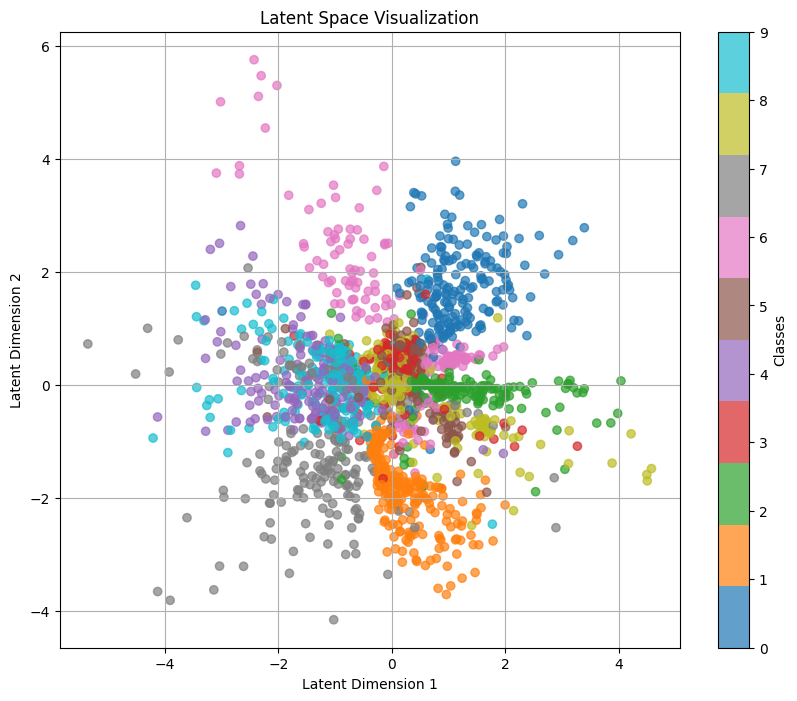

In [9]:
def visualize(vae, dataloader, batch_count=30, title='Latent Space Visualization'):
    """Visualize the latent space of the VAE."""
    vae.eval()  # Set the model to evaluation mode
    latents = []
    labels = []

    with torch.no_grad():
        for i, (data, label) in enumerate(dataloader):
            if i >= batch_count:
                break  # Limit the number of batches processed

            # Move data to the correct device
            data = data.to(device)

            # Get the latent means from the encoder
            mean, _ = vae.encode(data)
            latents.append(mean.cpu().numpy())
            labels.append(label.numpy())

    # Concatenate results from all batches
    latents = np.concatenate(latents, axis=0)
    labels = np.concatenate(labels, axis=0)

    # Plotting
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(latents[:, 0], latents[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, label='Classes')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.title(title)
    plt.grid()
    plt.show()

visualize(model, merged_loader)

Imagine if the input data for the encoder followed a very different distribution. Invert the images in the original datset and plot the latent dimension once more to show the difference.

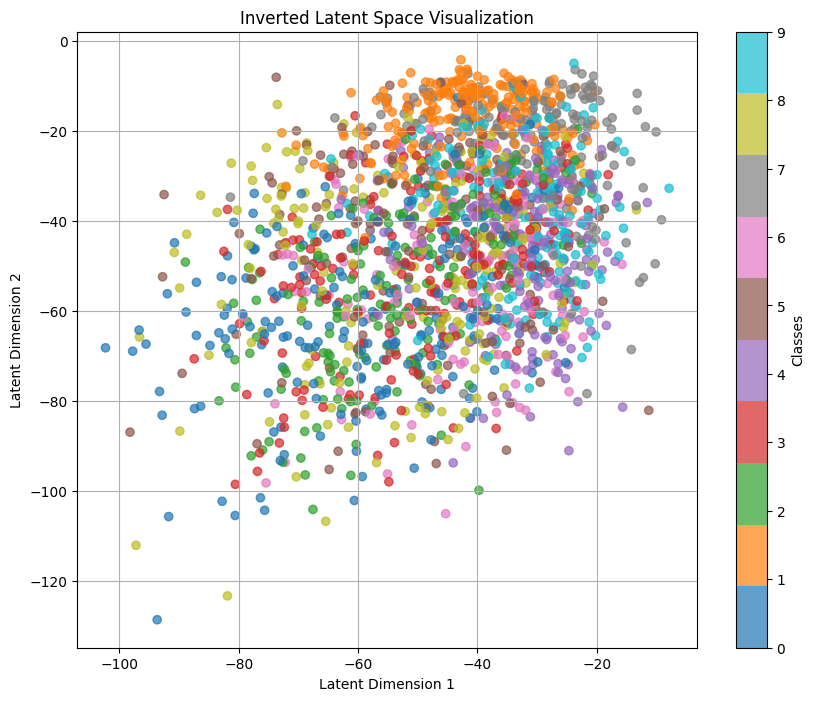

In [10]:
def inverted_visualize(vae, dataloader, batch_count=30, title='Inverted Latent Space Visualization'):
    """Visualize the latent space of the VAE using inverted images."""
    vae.eval()  # Set the model to evaluation mode
    latents = []
    labels = []

    with torch.no_grad():
        for i, (data, label) in enumerate(dataloader):
            if i >= batch_count:
                break  # Limit the number of batches processed

            # Invert the images
            inverted_data = 1 - data  # Invert the pixel values (assuming normalized between 0 and 1)
            inverted_data = inverted_data.to(device)  # Move to the correct device

            # Get the latent means from the encoder
            mean, _ = vae.encode(inverted_data)
            latents.append(mean.cpu().numpy())
            labels.append(label.numpy())

    # Concatenate results from all batches
    latents = np.concatenate(latents, axis=0)
    labels = np.concatenate(labels, axis=0)

    # Plotting
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(latents[:, 0], latents[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, label='Classes')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.title(title)
    plt.grid()
    plt.show()

inverted_visualize(model, merged_loader)

Explain how the difference in the latent dimension allows us to detect data samples that don't follow the original distribution. How can this difference be used for anomaly detection? If we had used an autoencoder instead, what would be our observation then?

*`Your Answer:`*
Summerize into two paragraphs
In Variational Autoencoders (VAEs), the latent space is designed to follow a specific prior distribution, typically a standard normal distribution. This probabilistic structure allows for anomaly detection by examining how closely the latent representation of new data samples adheres to the prior distribution. If a new sample's latent representation significantly deviates from this expected distribution, it indicates an anomaly. Additionally, VAEs use reconstruction error as another metric for anomaly detection, where higher errors suggest that the model struggles to accurately reconstruct anomalous data.

In contrast, standard autoencoders do not enforce a probabilistic structure on the latent space and instead learn a deterministic mapping from input to latent space and back. Anomaly detection in autoencoders relies primarily on reconstruction error. Normal data is expected to be reconstructed with low error, while anomalous data typically results in higher reconstruction errors due to the model's inability to generalize well to out-of-distribution samples. Thus, while both VAEs and autoencoders can detect anomalies, VAEs provide a more robust framework by leveraging both latent space adherence and reconstruction error.

# The Decoder (20 points)

In this section we are going to test the properties of the decoder. First implement a function to create samples based on the input mean and variance.

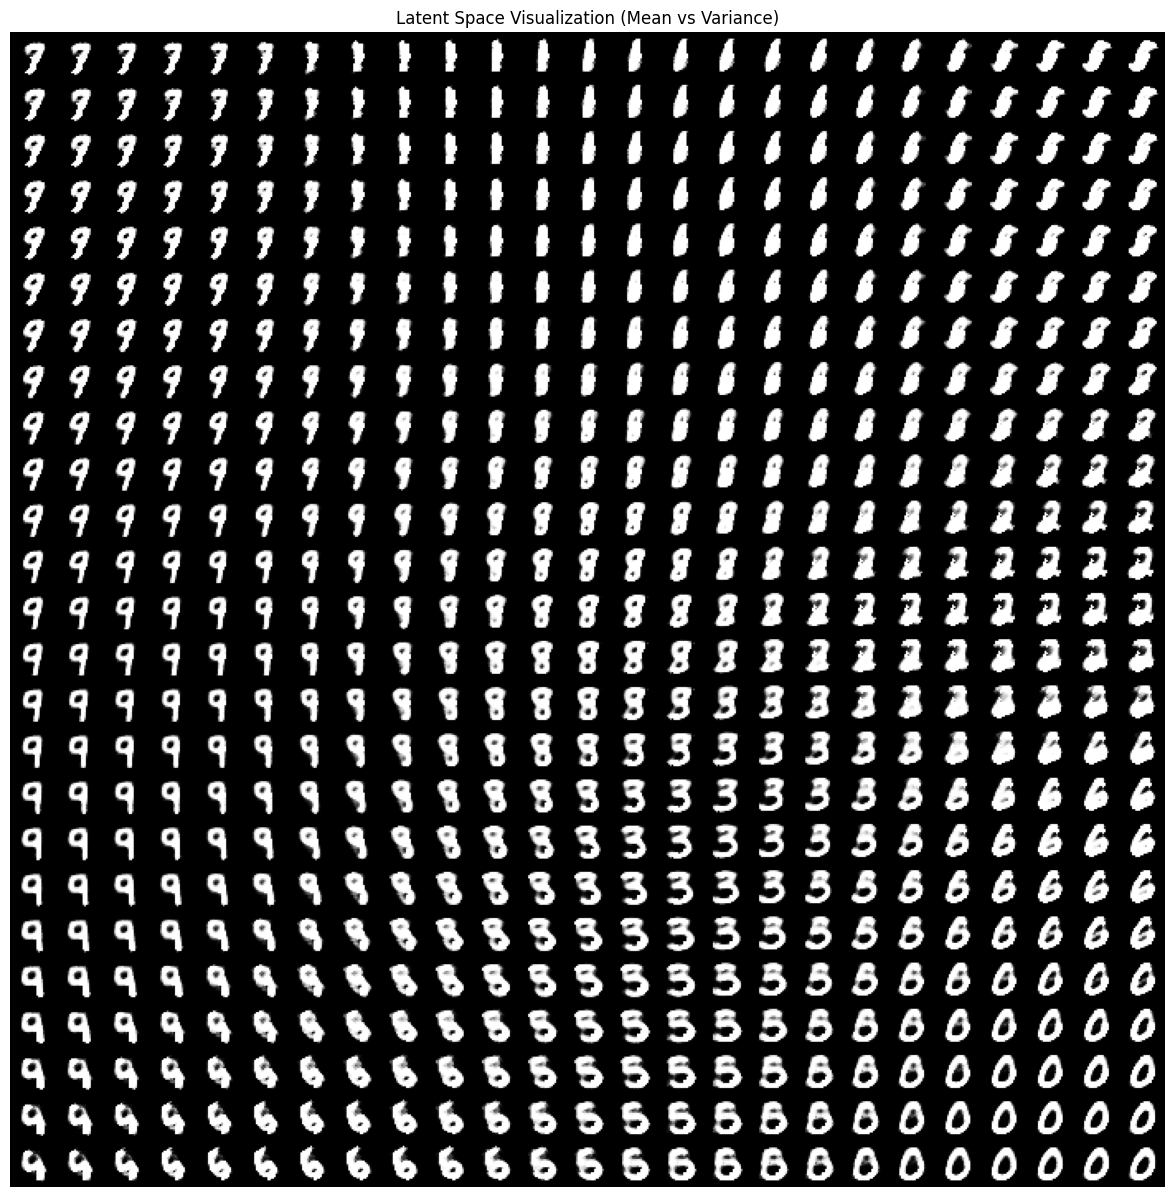

In [13]:
def generate_digit(model, mean, var):
    """Generate an image from the latent space using the given mean and variance."""
    # Move mean and var to the same device as the model
    mean = mean.to(next(model.parameters()).device)
    var = var.to(next(model.parameters()).device)

    # Sample from the standard normal distribution
    std = torch.exp(0.5 * var)  # Compute the standard deviation
    eps = torch.randn_like(std)  # Sample from a standard normal distribution

    # Reparameterization trick: z = mean + std * eps
    z = mean + std * eps

    # Pass the latent vector z through the decoder to generate an image
    with torch.no_grad():
        generated_image = model.decode(z)

    return generated_image

def plot_latent_space(model, mean_scale=1.0, var_scale=1.0, n=25, digit_size=28, figsize=15):
    """Display a n*n 2D manifold of digits where x-axis is mean and y-axis is variance."""
    # Create a figure to display the grid
    figure = np.zeros((digit_size * n, digit_size * n))

    # Generate a grid of points for mean and variance
    mean_values = np.linspace(-mean_scale, mean_scale, n)  # X-axis (mean)
    var_values = np.linspace(-var_scale, var_scale, n)    # Y-axis (variance)

    model.eval()  # Set model to evaluation mode

    with torch.no_grad():
        for i, var in enumerate(var_values):
            for j, mean in enumerate(mean_values):
                # Create a latent vector from grid points
                z_sample = torch.tensor([[mean, var]], dtype=torch.float32).to(next(model.parameters()).device)

                # Generate an image from the latent vector
                x_decoded = model.decode(z_sample).cpu().numpy()
                digit = x_decoded[0].reshape(digit_size, digit_size)

                # Place the generated digit in the correct location in the figure
                figure[i * digit_size: (i + 1) * digit_size,
                       j * digit_size: (j + 1) * digit_size] = digit

    # Plot the figure
    plt.figure(figsize=(figsize, figsize))
    plt.imshow(figure, cmap='gray')
    plt.title('Latent Space Visualization (Mean vs Variance)')
    plt.xlabel('Mean')
    plt.ylabel('Variance')
    plt.axis('off')
    plt.show()

plot_latent_space(model, mean_scale=1, var_scale=1)